<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
/var/folders/1n/lcspcd710v10snl5k97yxc0m0000gn/T/ipykernel_37290/396449665.py:10: SyntaxWarning: invalid escape sequence '\d'
  df['loadtable_bag_weight_kg'] = df['loadtable_bag_weight'].str.extract('(\d+.\d+)').astype(float)
/var/folders/1n/lcspcd710v10snl5k97yxc0m0000gn/T/ipykernel_37290/396449665.py:11: SyntaxWarning: invalid escape sequence '\d'
  df['cki_bag_weight_kg'] = df['cki_bag_weight'].str.extract('(\d+.\d+)').astype(float)


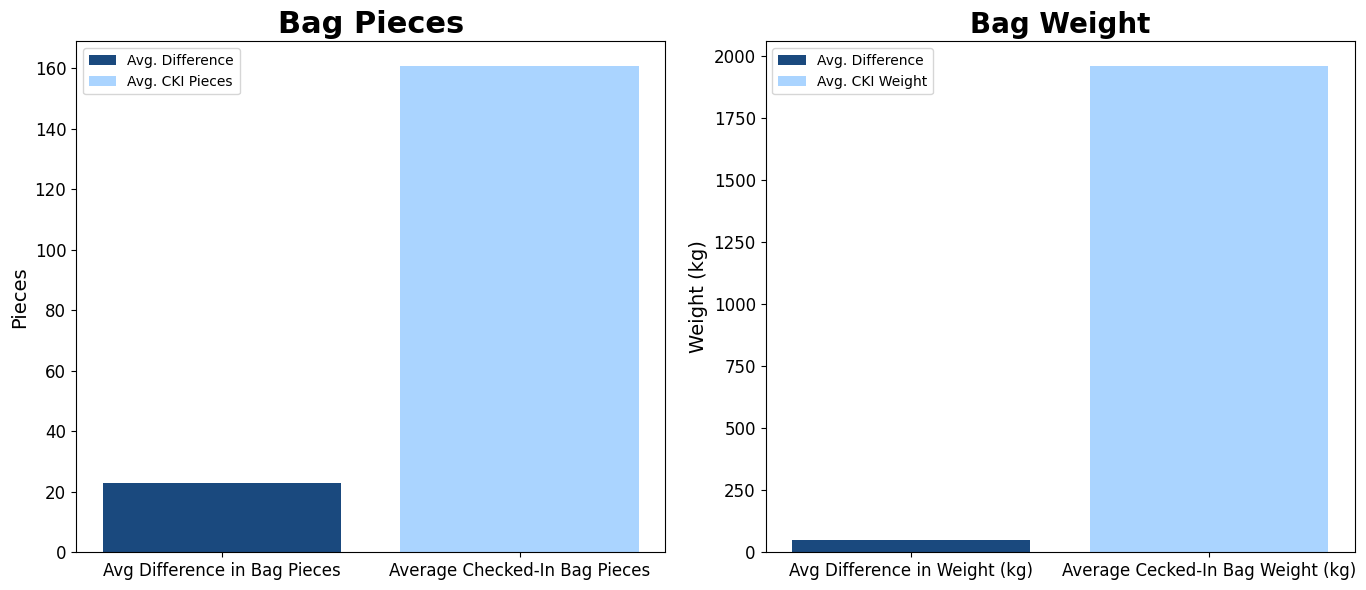

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = '/Users/nikyakovlev/Documents/GitHub/aircraft_load/data_engineering/niks_data_mata/RampFinalAction/filtered_loadtable_baggage_data_MNOP_new.csv'
df = pd.read_csv(file_path)

# Convert weight strings to numerical values (assuming weights are in 'XX.XX KG' format)
df['loadtable_bag_weight_kg'] = df['loadtable_bag_weight'].str.extract('(\d+.\d+)').astype(float)
df['cki_bag_weight_kg'] = df['cki_bag_weight'].str.extract('(\d+.\d+)').astype(float)

# Remove entries with false weight values (greater than 10,000 kg)
df = df[(df['loadtable_bag_weight_kg'] <= 10000.0) & (df['cki_bag_weight_kg'] <= 10000.0)]

# Calculate differences
df['diff_bag_pieces'] = df['cki_bag_pieces'] - df['loadtable_bag_pieces']
df['diff_bag_weight'] = df['cki_bag_weight_kg'] - df['loadtable_bag_weight_kg']

# Convert differences to positive by squaring and then taking the square root
df['diff_bag_pieces'] = np.sqrt(np.square(df['diff_bag_pieces']))
df['diff_bag_weight'] = np.sqrt(np.square(df['diff_bag_weight']))

# Calculate total and average differences
total_diff_weight = df['diff_bag_weight'].mean()
avg_diff_pieces = df['diff_bag_pieces'].mean()

# Calculate and add the average of cki_bag_pieces and cki_bag_weight_kg to each row
avg_cki_bag_pieces = df['cki_bag_pieces'].mean()
avg_cki_bag_weight_kg = df['cki_bag_weight_kg'].mean()

# Plotting the differences and averages in separate charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for average difference in bag pieces and average cki bag pieces
ax1.bar('Avg Difference in Bag Pieces', avg_diff_pieces, color='#1a497e')
ax1.bar('Average Checked-In Bag Pieces', avg_cki_bag_pieces, color='#AAD4FF')
ax1.set_title('Bag Pieces', fontsize=22, fontweight='bold')
ax1.set_ylabel('Pieces', fontsize=14)
ax1.legend(['Avg. Difference', 'Avg. CKI Pieces'])
ax1.tick_params(axis='both', labelsize=12)  # Set tick label size

# Bar chart for total difference in bag weight and average cki bag weight
ax2.bar('Avg Difference in Weight (kg)', total_diff_weight, color='#1a497e')
ax2.bar('Average Cecked-In Bag Weight (kg)', avg_cki_bag_weight_kg, color='#AAD4FF')
ax2.set_title('Bag Weight', fontsize=20, fontweight='bold')
ax2.set_ylabel('Weight (kg)', fontsize=14)
ax2.legend(['Avg. Difference', 'Avg. CKI Weight'])
ax2.tick_params(axis='both', labelsize=12)  # Set tick label size

plt.tight_layout()
plt.show()


<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
/var/folders/1n/lcspcd710v10snl5k97yxc0m0000gn/T/ipykernel_37290/2383437624.py:9: SyntaxWarning: invalid escape sequence '\d'
  df['loadtable_bag_weight_kg'] = df['loadtable_bag_weight'].str.extract('(\d+.\d+)').astype(float)
/var/folders/1n/lcspcd710v10snl5k97yxc0m0000gn/T/ipykernel_37290/2383437624.py:10: SyntaxWarning: invalid escape sequence '\d'
  df['cki_bag_weight_kg'] = df['cki_bag_weight'].str.extract('(\d+.\d+)').astype(float)


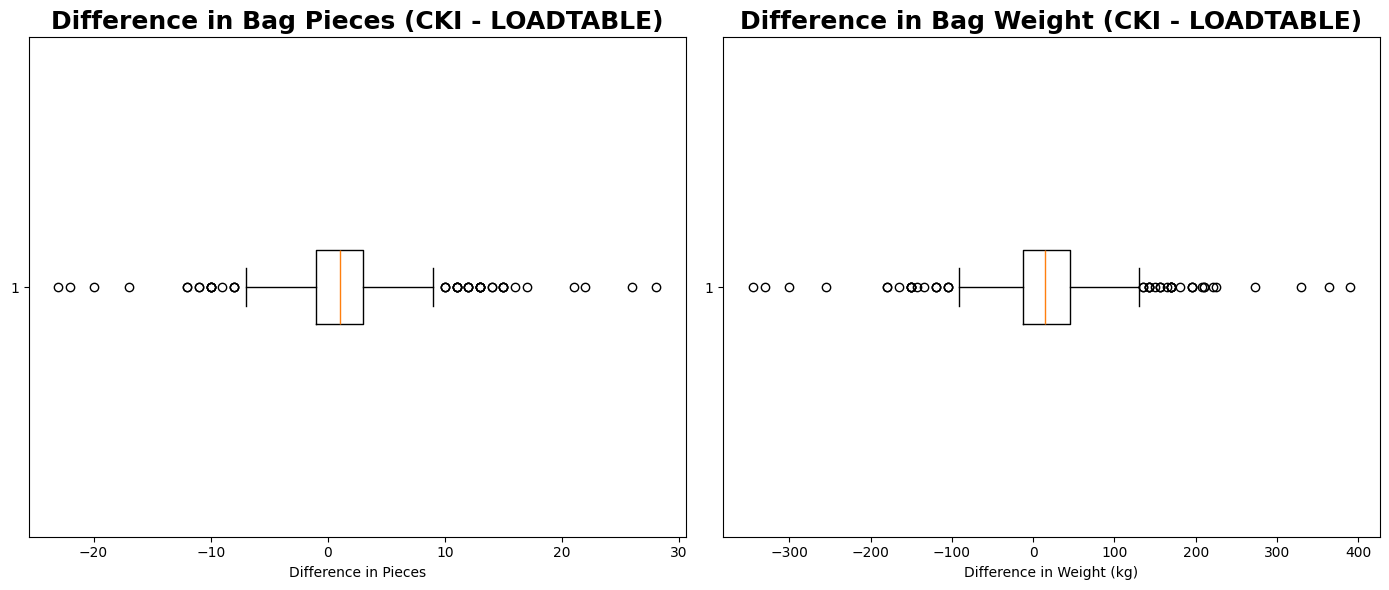

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/Users/nikyakovlev/Documents/GitHub/aircraft_load/data_engineering/niks_data_mata/RampFinalAction/filtered_loadtable_baggage_data_MNOP_new.csv'
df = pd.read_csv(file_path)

# Convert weight strings to numerical values (assuming weights are in 'XX.XX KG' format)
df['loadtable_bag_weight_kg'] = df['loadtable_bag_weight'].str.extract('(\d+.\d+)').astype(float)
df['cki_bag_weight_kg'] = df['cki_bag_weight'].str.extract('(\d+.\d+)').astype(float)

# Calculate the differences
df['diff_bag_pieces'] = df['cki_bag_pieces'] - df['loadtable_bag_pieces']
df['diff_bag_weight'] = df['cki_bag_weight_kg'] - df['loadtable_bag_weight_kg']

# Apply more stringent filtering criteria for weight differences
# Assuming a maximum reasonable difference might be 1000 kg for operational data
max_reasonable_difference = 1000
df_filtered = df[(df['diff_bag_pieces'].abs() <= 30) &  # Updating to more reasonable number for piece differences if needed
                 (df['diff_bag_weight'].abs() <= max_reasonable_difference)]

# Plotting the differences using boxplots after filtering extreme values
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for the difference in bag pieces
ax[0].boxplot(df_filtered['diff_bag_pieces'].dropna(), vert=False)
ax[0].set_title('Difference in Bag Pieces (CKI - LOADTABLE)', fontsize = 18, fontweight = "bold")
ax[0].set_xlabel('Difference in Pieces')

# Boxplot for the difference in bag weight
ax[1].boxplot(df_filtered['diff_bag_weight'].dropna(), vert=False)
ax[1].set_title('Difference in Bag Weight (CKI - LOADTABLE)', fontsize = 18, fontweight = "bold")
ax[1].set_xlabel('Difference in Weight (kg)')

plt.tight_layout()
plt.show()


<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
/var/folders/1n/lcspcd710v10snl5k97yxc0m0000gn/T/ipykernel_37290/465829908.py:10: SyntaxWarning: invalid escape sequence '\d'
  df['loadtable_bag_weight_kg'] = df['loadtable_bag_weight'].str.extract('(\d+.\d+)').astype(float)
/var/folders/1n/lcspcd710v10snl5k97yxc0m0000gn/T/ipykernel_37290/465829908.py:11: SyntaxWarning: invalid escape sequence '\d'
  df['cki_bag_weight_kg'] = df['cki_bag_weight'].str.extract('(\d+.\d+)').astype(float)
/var/folders/1n/lcspcd710v10snl5k97yxc0m0000gn/T/ipykernel_37290/465829908.py:29: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=df_filtered, y='Difference in Pieces', ax=ax[0], inner='point', scale='width')
/var/folders/1n/lcspcd710v10snl5k97y

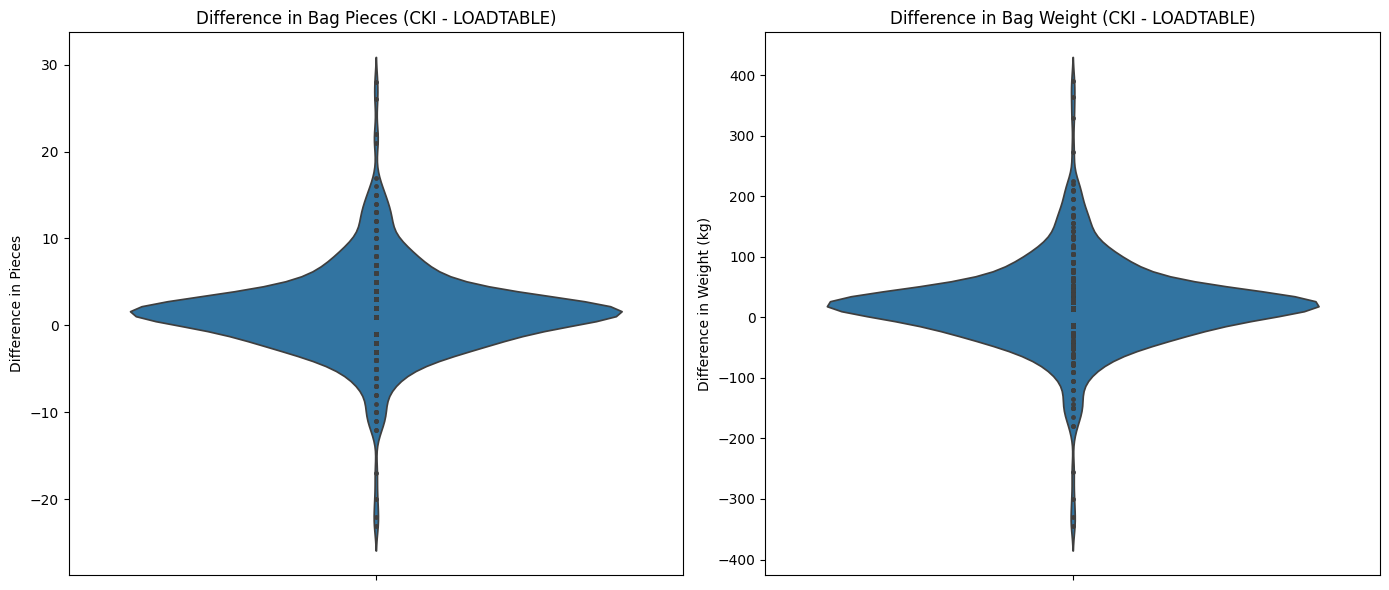

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = '/Users/nikyakovlev/Documents/GitHub/aircraft_load/data_engineering/niks_data_mata/RampFinalAction/filtered_loadtable_baggage_data_MNOP_new.csv'
df = pd.read_csv(file_path)

# Convert weight strings to numerical values
df['loadtable_bag_weight_kg'] = df['loadtable_bag_weight'].str.extract('(\d+.\d+)').astype(float)
df['cki_bag_weight_kg'] = df['cki_bag_weight'].str.extract('(\d+.\d+)').astype(float)

# Calculate the differences
df['Difference in Pieces'] = df['cki_bag_pieces'] - df['loadtable_bag_pieces']
df['Difference in Weight (kg)'] = df['cki_bag_weight_kg'] - df['loadtable_bag_weight_kg']

# Apply filtering to remove extreme outliers
max_reasonable_diff_weight = 1000  # Max reasonable weight difference in kg
max_reasonable_diff_pieces = 30    # Max reasonable pieces difference

# Filtering out extreme values
df_filtered = df[(df['Difference in Pieces'].abs() <= max_reasonable_diff_pieces) &
                 (df['Difference in Weight (kg)'].abs() <= max_reasonable_diff_weight)]

# Plotting using seaborn for more detailed distribution analysis
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Violin plot for the difference in bag pieces
sns.violinplot(data=df_filtered, y='Difference in Pieces', ax=ax[0], inner='point', scale='width')
ax[0].set_title('Difference in Bag Pieces (CKI - LOADTABLE)')

# Violin plot for the difference in bag weight
sns.violinplot(data=df_filtered, y='Difference in Weight (kg)', ax=ax[1], inner='point', scale='width')
ax[1].set_title('Difference in Bag Weight (CKI - LOADTABLE)')

plt.tight_layout()
plt.show()


<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
/var/folders/1n/lcspcd710v10snl5k97yxc0m0000gn/T/ipykernel_37290/4112832693.py:9: SyntaxWarning: invalid escape sequence '\d'
  df['loadtable_bag_weight_kg'] = df['loadtable_bag_weight'].str.extract('(\d+.\d+)').astype(float)
/var/folders/1n/lcspcd710v10snl5k97yxc0m0000gn/T/ipykernel_37290/4112832693.py:10: SyntaxWarning: invalid escape sequence '\d'
  df['cki_bag_weight_kg'] = df['cki_bag_weight'].str.extract('(\d+.\d+)').astype(float)


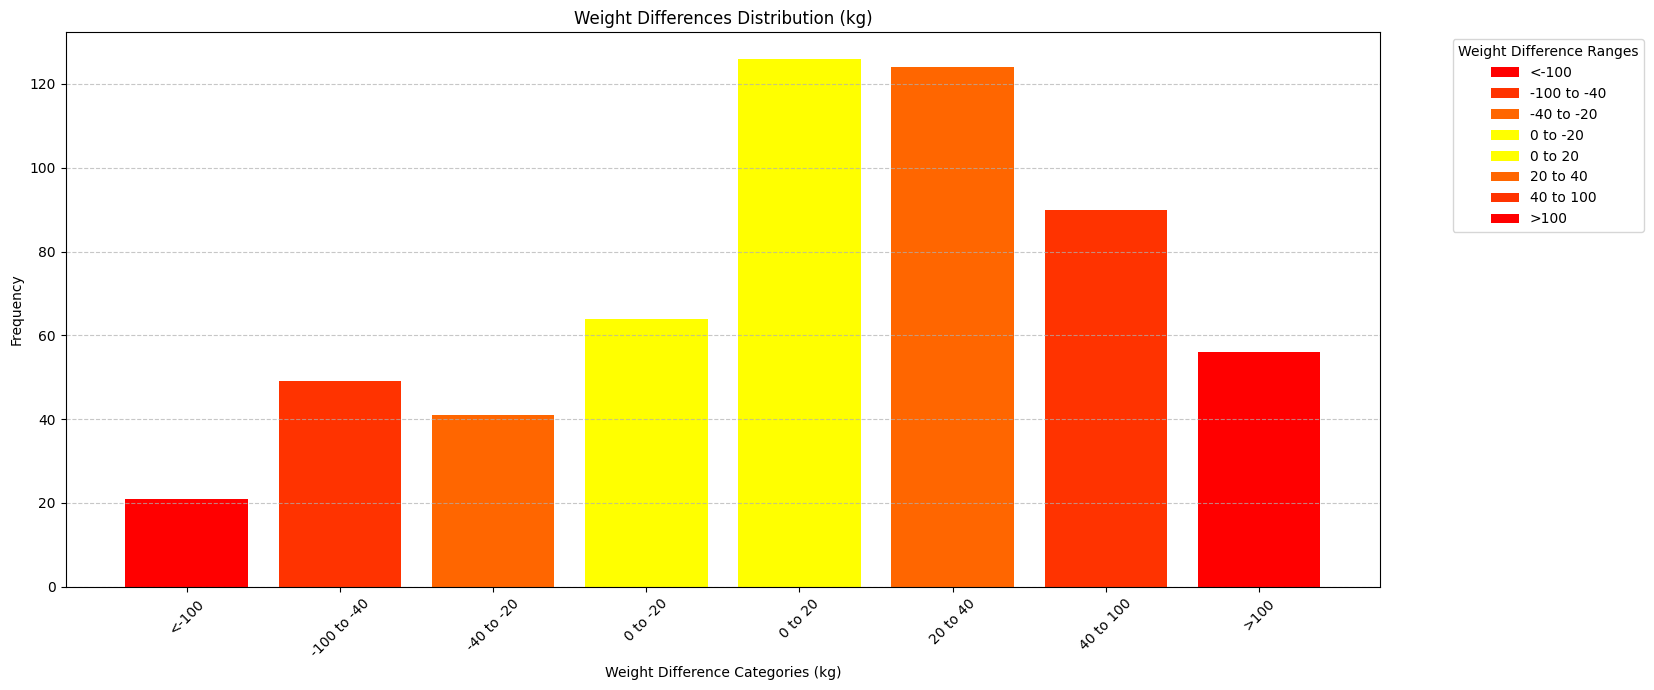

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/Users/nikyakovlev/Documents/GitHub/aircraft_load/data_engineering/niks_data_mata/RampFinalAction/filtered_loadtable_baggage_data_MNOP_new.csv'
df = pd.read_csv(file_path)

# Convert weight strings to numerical values
df['loadtable_bag_weight_kg'] = df['loadtable_bag_weight'].str.extract('(\d+.\d+)').astype(float)
df['cki_bag_weight_kg'] = df['cki_bag_weight'].str.extract('(\d+.\d+)').astype(float)

# Calculate the differences
df['weight_difference'] = df['cki_bag_weight_kg'] - df['loadtable_bag_weight_kg']

# Define the bins for weight differences
bins = [-float('inf'), -100, -40, -20, 0, 20, 40, 100, float('inf')]
labels = ['<-100', '-100 to -40', '-40 to -20', '0 to -20', 
          '0 to 20', '20 to 40', '40 to 100', '>100']

# Categorize the weight differences using the bins
df['weight_diff_category'] = pd.cut(df['weight_difference'], bins=bins, labels=labels)

# Count the occurrences in each bin
weight_diff_counts = df['weight_diff_category'].value_counts().reindex(labels).fillna(0)

# Define custom colors, focusing yellow in the middle and reds towards the extremes
colors = ['#ff0000', '#ff3300', '#ff6600', '#ffff00', 
          '#ffff00', '#ff6600', '#ff3300', '#ff0000']

# Plotting
plt.figure(figsize=(14, 7))
bars = plt.bar(weight_diff_counts.index, weight_diff_counts.values, color=colors)
plt.title('Weight Differences Distribution (kg)')
plt.xlabel('Weight Difference Categories (kg)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Optionally, add a legend or color-code explanation
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors[i], label=labels[i]) for i in range(len(labels))]
plt.legend(handles=legend_elements, title="Weight Difference Ranges", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
/var/folders/1n/lcspcd710v10snl5k97yxc0m0000gn/T/ipykernel_37290/700214475.py:9: SyntaxWarning: invalid escape sequence '\d'
  df['loadtable_bag_weight_kg'] = df['loadtable_bag_weight'].str.extract('(\d+.\d+)').astype(float)
/var/folders/1n/lcspcd710v10snl5k97yxc0m0000gn/T/ipykernel_37290/700214475.py:10: SyntaxWarning: invalid escape sequence '\d'
  df['cki_bag_weight_kg'] = df['cki_bag_weight'].str.extract('(\d+.\d+)').astype(float)


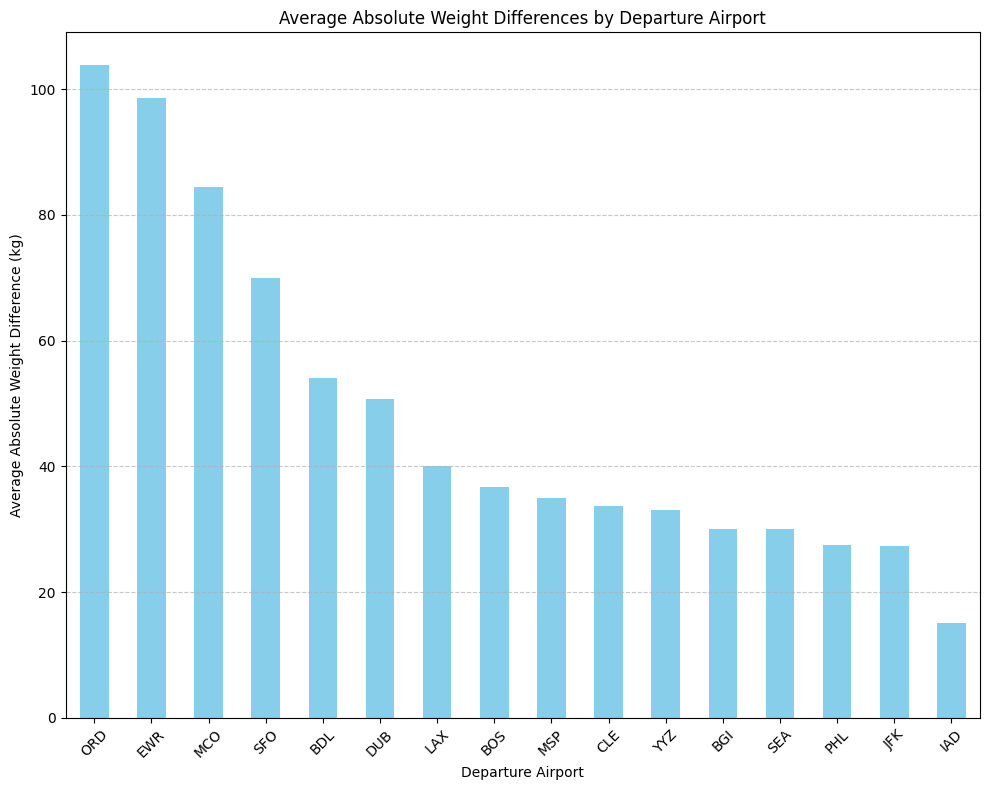

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/Users/nikyakovlev/Documents/GitHub/aircraft_load/data_engineering/niks_data_mata/RampFinalAction/filtered_loadtable_baggage_data_MNOP_new.csv'
df = pd.read_csv(file_path)

# Convert weight strings to numerical values if necessary
df['loadtable_bag_weight_kg'] = df['loadtable_bag_weight'].str.extract('(\d+.\d+)').astype(float)
df['cki_bag_weight_kg'] = df['cki_bag_weight'].str.extract('(\d+.\d+)').astype(float)

# Calculate the absolute differences by squaring and then taking the square root
df['abs_weight_difference'] = np.sqrt((df['cki_bag_weight_kg'] - df['loadtable_bag_weight_kg']) ** 2)

# Define max reasonable differences for absolute weight (considering operational limits)
max_reasonable_abs_diff_weight = 1000  # Max reasonable absolute weight difference in kg

# Filter out extreme values based on absolute differences
df_filtered = df[df['abs_weight_difference'] <= max_reasonable_abs_diff_weight]

# Group by departure airport and calculate average absolute difference
airport_avg_diff = df_filtered.groupby('departure_airport')['abs_weight_difference'].mean()

# Sort the airports by average absolute weight difference
sorted_airports = airport_avg_diff.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
sorted_airports.plot(kind='bar', color='skyblue')
plt.title('Average Absolute Weight Differences by Departure Airport')
plt.xlabel('Departure Airport')
plt.ylabel('Average Absolute Weight Difference (kg)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()